In [21]:
import numpy as np
import matplotlib.pyplot as plt



In [27]:
class LogicReg:
    def __init__(self,inputX,inputY,init_weights=None,init_bias=None):
        self.inputX = inputX
        self.M, self.N = inputX.shape
        if init_weights is None:
            self.W = np.zeros((self.N,1))
        else:
            self.W = init_weights
        if init_bias is None:
            self.B    = 0
        else:
            self.B = init_bias
        self.inputY = inputY.reshape(self.M,1)

    def sigmoid(self,X):
        return (1/(1+np.exp(-X)))

    def cal_prob(self,X,W,B):
        prob = self.sigmoid(np.dot(X,W)+B)
        return prob

    def predict(self,X):
        prob = self.cal_prob(X,self.W,self.B)
        y_pred = np.zeros(prob.shape)
        y_pred[prob>0.5] = 1
        return y_pred

    def accuracy(self,X,Y):
        Y = Y.reshape(len(Y),1)
        y_pred = self.predict(X)
        return 1.0*(Y==y_pred).sum()/len(Y)

    def cal_maxilikelyhood(self,X,Y,W,B):
        n = len(X)
        y_prob = self.cal_prob(X,W,B)
        mllh = -1/n*np.mean(Y*np.log(y_prob)+(1-Y)*np.log(1-y_prob))
        return mllh

    def fit(self,learning_rate=None,iteration=1000):
        if learning_rate is None:
            learning_rate = 0.01
        
        loss = np.zeros(iteration)
        for i in range(iteration):
            self.cal_gradient_des(learning_rate)
            # update weights    
            self.W = self.W - learning_rate * self.dW    
            self.B = self.B - learning_rate * self.dB
            gredient = self.cal_maxilikelyhood(X,Y,self.W,self.B)
            loss[i] = gredient
        self.loss = loss

        print ('training finished')
        return 

    def cal_gradient_des(self,learning_rate):
        X = self.inputX
        Y = self.inputY
        W = self.W
        B = self.B
        y_prob = self.cal_prob(X,W,B)
        dif = y_prob-Y
        self.dW = learning_rate*np.dot(X.T,dif)
        self.dB = learning_rate*np.mean(dif)



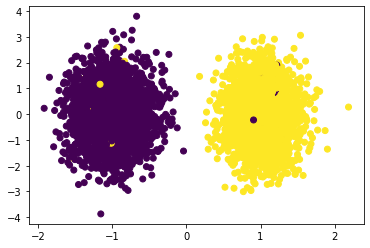

0.9933333333333333


In [22]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X,Y = make_classification(n_samples=5000,n_features=2,n_redundant=0,n_informative=1,n_clusters_per_class=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()


clf = LogisticRegression(random_state=42).fit(X_train,y_train)
print (clf.score(X_test,y_test))
# print (clf.get_params())

In [30]:
model = LogicReg(X_train,y_train)
model.fit(learning_rate=0.1,iteration=100)
print (model.accuracy(X_test,y_test))

# plt.scatter(X,Y)
# plt.scatter(X,ypre)
# plt.show()

training finished
0.9933333333333333
